In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
filename = "Ixchil/results_noGEN.h5"
filename = "Jocotan/results_noGEN.h5"
#filename = "Jocotan/results.h5"
#filename = "Ixchil/results.h5"
#filename = "Sensitivity/results.h5"
#filename = "results.h5"

In [54]:

df_results = pd.read_hdf(filename, key='df_results')
dfTS = pd.read_hdf(filename, key='df_resultsTS')

dfTS['Time_step'] = dfTS.index.astype(int)
df_resultsTS = dfTS.set_index(['Scenario', 'Time_step'])

In [55]:
df_resultsTS = df_resultsTS.loc[0]
df_results.total_cost

0    5546.20663
Name: total_cost, dtype: float64

In [5]:
df_bla = df_resultsTS['stg_flowOut']#, 'PV_energy_gen_output', 'NSL', 'loads', 'rectifier_energy_output', 'inverter_energy_output']
df_resultsTS[['stg_SoC', 'stg_flowOut', 'stg_flowIn','PV_energy_gen_output', 'NSL', 'loads', 'rectifier_energy_output', 'inverter_energy_output', 'GEN_energy_gen_output' ]].loc[0:24]

stg_SoC           stg_flowOut           stg_flowIn            \
                1         2           1         2          1         2   
Time_step                                                                
1             0.0  1.180859         0.0  0.094900        0.0  0.000000   
2             0.0  1.071867         0.0  0.105677        0.0  0.000000   
3             0.0  0.964001         0.0  0.104589        0.0  0.000000   
4             0.0  0.848078         0.0  0.112407        0.0  0.000000   
5             0.0  0.717980         0.0  0.126163        0.0  0.000000   
6             0.0  0.659973         0.0  0.056238        0.0  0.000000   
7             0.0  0.601263         0.0  0.056924        0.0  0.000000   
8             0.0  0.601238         0.0  0.000000        0.0  0.000000   
9             0.0  0.483866         0.0  0.113828        0.0  0.000000   
10            0.0  0.483846         0.0  0.000000        0.0  0.000000   
11            0.0  0.483827         0.0  0.000000        0.0  0.000000   
12            0.0  0.509247         0.0  0.000000        0.0  0.026226   
13            0.0  1.275957         0.0  0.000000        0.0  0.790444   
14            0.0  0.944199         0.0  0.321756        0.0  0.000000   
15            0.0  1.278746         0.0  0.000000        0.0  0.344932   
16            0.0  1.109550         0.0  0.164070        0.0  0.000000   
17            0.0  1.099547         0.0  0.009660        0.0  0.000000   
18            0.0  0.865892         0.0  0.226602        0.0  0.000000   
19            0.0  0.127946         0.0  0.715774        0.0  0.000000   
20            0.0  0.127941         0.0  0.000000        0.0  0.000000   
21            0.0  0.127936         0.0  0.000000        0.0  0.000000   
22            0.0  0.127931         0.0  0.000000        0.0  0.000000   
23            0.0  0.127926         0.0  0.000000        0.0  0.000000   
24            0.0  0.127921         0.0  0.000000        0.0  0.000000   

          PV_energy_gen_output  NSL     loads rectifier_energy_output  \
                                                                        
Time_step                                                               
1                     0.000000  0.0  0.090155                     0.0   
2                     0.000000  0.0  0.100393                     0.0   
3                     0.000000  0.0  0.099359                     0.0   
4                     0.000000  0.0  0.106787                     0.0   
5                     0.000000  0.0  0.119855                     0.0   
6                     0.000000  0.0  0.053426                     0.0   
7                     0.001158  0.0  0.055178                     0.0   
8                     0.009005  0.0  0.008555                     0.0   
9                     0.323144  0.0  0.415123                     0.0   
10                    0.201621  0.0  0.191540                     0.0   
11                    0.360042  0.0  0.342040                     0.0   
12                    0.039071  0.0  0.012203                     0.0   
13                    0.848976  0.0  0.055605                     0.0   
14                    0.800331  0.0  1.528549                     0.0   
15                    0.692616  0.0  0.330299                     0.0   
16                    0.487611  0.0  0.619097                     0.0   
17                    0.265233  0.0  0.261148                     0.0   
18                    0.024323  0.0  0.926243                     0.0   
19                    0.000000  0.0  1.949577                     0.0   
20                    0.000000  0.0  1.147013                     0.0   
21                    0.000000  0.0  1.068295                     0.0   
22                    0.000000  0.0  0.590613                     0.0   
23                    0.000000  0.0  0.403195                     0.0   
24                    0.000000  0.0  0.542254                     0.0   

          inverter_energy_output GEN_en

In [6]:
df_results_single_col = df_results.sum(level=0, axis=1)
df_capacities =  df_results_single_col[df_results_single_col.columns[df_results_single_col.columns.to_series().str.contains('capacity')]].drop(['WT_capacity','GEN_capacity_max'],axis = 1)
df_capacities.round(2)

,BID_capacity,PV_capacity,stg_capacity,GEN_capacity
0,1.07,1.16,1.28,1.27


In [17]:
r  = df_results['discount_rate']

def AF(r, L):
    return r/(1-(r+1)**(-L))

# lcoe
energy_supplied = (df_resultsTS['loads']-df_resultsTS['NSL']).sum()
df_results['lcoe_$/kW'] = df_results['total_cost']/energy_supplied

# total demand
df_results['annual_demand_kWh']  = df_resultsTS['loads'].sum()
print(df_results['annual_demand_kWh'] )
#peak demand
df_results['peak_demand_kW'] = df_resultsTS.loads.max()
print(df_results['peak_demand_kW'])
# supply reliability
df_results['supply_reliability_ratio'] = energy_supplied/df_results['annual_demand_kWh']


# total shortage
df_results.total_shortage_kWh = df_resultsTS.NSL.sum()

# res share
df_results['GEN_annual_output_kWh'] = df_resultsTS['GEN_energy_gen_output'].sum()
df_results['PV_annual_output_kWh'] = df_resultsTS['PV_energy_gen_output'].sum()
df_results['WT_annual_output_kWh'] = df_resultsTS['WT_energy_gen_output'].sum().sum()
df_results['RES_share'] = 1 - (df_results.GEN_annual_output_kWh/(df_results.GEN_annual_output_kWh+df_results.PV_annual_output_kWh+df_results.WT_annual_output_kWh))

df_resultsTS['PV_generation'] = df_resultsTS.pv_nominal_output.multiply(df_results['PV_capacity'][0])
df_results['PV_generation_kWh'] = df_resultsTS.PV_generation.sum()

# total excess
df_resultsTS['electricity_excess'] = df_resultsTS['PV_generation']  -  df_resultsTS['PV_energy_gen_output']
df_results['total_excess_kWh'] = df_resultsTS['electricity_excess'].sum()
df_results['total_excess_%'] = df_results['total_excess_kWh']/df_results['PV_generation_kWh']

# first_investment

# operation_maintainance_expenditures
df_results['PV_cost_OM'] = df_results.pv_cost_om/8760*df_results['PV_generation_kWh']
df_results['BID_cost_OM'] = df_results.inverter_cost_om/8760*(df_resultsTS.inverter_energy_output.sum() + df_resultsTS.rectifier_energy_output.sum())
df_results['GEN_cost_OM'] = df_results.GEN_cost_om/8760*sum(df_resultsTS.GEN_energy_gen_output)


# annual fuel consumption (lt)
df_results['fuel_annual_consumption_l'] = df_resultsTS['GEN_energy_gen_output'].sum()/df_results['GEN_fuel_LHV']/df_results['GEN_efficiency']

# generator_operation_hours
#df_results['generator_operation_hours'] = df_resultsTS['GEN_ON'].sum()
df_results['generator_operation_hours'] = df_resultsTS['GEN_energy_gen_output'].astype(bool).sum()

# investment costs
df_results['PV_cost_inv'] = df_results['PV_capacity']*df_results['pv_specific_cost_inv']
df_results['PV_cost_inv_a'] = df_results.PV_cost_inv*AF(r,df_results.pv_lifetime) 

#costs_bidirectional_converter  
df_results['BID_cost_inv'] =  df_results['BID_capacity']*df_results['BID_specific_cost_inv']
df_results['BID_cost_inv_a'] = df_results.BID_cost_inv*AF(r,df_results.BID_lifetime) 

#costs generator
df_results['GEN_cost_inv'] = df_results['GEN_capacity']*df_results['GEN_specific_cost_inv']
df_results['GEN_cost_inv_a'] = df_results.GEN_cost_inv*AF(r,df_results.GEN_lifetime)

#costs_storage
df_results['stg_cost_inv'] = 0
df_results['stg_cost_inv_a'] = 0
df_results['stg_cost_OM'] = 0
for stg in df_results.stg_presence.columns:
    df_results['stg_cost_inv']  += df_results.stg_presence[stg]*df_results['stg_capacity'][stg]*df_results['stg_specific_cost_inv'][stg]
    df_results['stg_cost_inv_a']  += df_results.stg_presence[stg]*df_results['stg_capacity'][stg]*df_results['stg_specific_cost_inv'][stg]*AF(r,df_results['stg_lifetime'][stg]) 
    df_results.stg_cost_OM += df_results.stg_cost_om[stg]/8760*(df_resultsTS.stg_flowOut[stg].sum()+df_resultsTS.stg_flowIn[stg].sum())
    
#costs_wind

for wt in df_results.WT_presence.columns:
    df_results['WT_capacity_installed', wt] = df_results.WT_presence[wt]*df_results['WT_capacity'][wt]
df_results['WT_cost_inv'] = 0 
df_results['WT_cost_inv_a'] = 0
df_results['WT_cost_OM'] = 0
for wt in df_results.WT_presence.columns:
    df_results['WT_cost_inv'] += df_results.WT_capacity_installed[wt]*df_results['WT_specific_cost_inv'][wt]
    df_results['WT_cost_inv_a'] += df_results.WT_capacity_installed[wt]*df_results['WT_specific_cost_inv'][wt]*AF(r, df_results['WT_lifetime'][wt])
    df_results.WT_cost_OM += df_results.WT_cost_om[wt]/8760*sum(df_resultsTS.WT_energy_gen_output[wt])


    
    
df_cost_inv = df_results[['PV_cost_inv', 'stg_cost_inv', 'BID_cost_inv','GEN_cost_inv','WT_cost_inv']]
df_results['initial_investment'] = df_cost_inv.T.sum()
#df_annuity = df_results[['PV_cost_inv_a', 'stg_cost_inv_a', 'BID_cost_inv_a','GEN_cost_inv_a','WT_cost_inv_a']]
df_cost_inv_a = df_results[['PV_cost_inv_a', 'stg_cost_inv_a', 'BID_cost_inv_a','GEN_cost_inv_a']]
df_cost_inv_a.columns = ['PV_cost_inv_a', 'stg_cost_inv_a', 'BID_cost_inv_a','GEN_cost_inv_a']

df_cost_OM = df_results[['PV_cost_OM', 'stg_cost_OM', 'BID_cost_OM','GEN_cost_OM','WT_cost_OM']]
df_results['OPEX'] = df_cost_OM.T.sum()


df_annuity = pd.DataFrame()
df_annuity['PV'] = df_results.PV_cost_inv_a + df_results.PV_cost_OM
df_annuity['BAT'] = df_results.stg_cost_inv_a + df_results.stg_cost_OM
df_annuity['BID'] = df_results.BID_cost_inv_a + df_results.BID_cost_OM
df_annuity['GEN'] = df_results.GEN_cost_inv_a + df_results.GEN_cost_OM
df_annuity.columns = ['PV_cost_inv_a', 'stg_cost_inv_a', 'BID_cost_inv_a','GEN_cost_inv_a']

df_results['annualized_CAPEX'] = df_annuity.T.sum()
#costs_fuel
df_results['Fuel_cost'] = df_results.fuel_annual_consumption_l*df_results['GEN_fuel_specific_cost']


#costs_distribution_grid

#costs_project


# OM cost
print(df_results.annualized_CAPEX + df_results.Fuel_cost + df_results.OPEX)
print(df_cost_OM)
print(df_results.fuel_cost)
print(df_annuity)
print(df_cost_inv)

print(df_results.peak_demand_kW)
df_results_single_col = df_results.sum(level=0, axis=1)

df_final = df_results_single_col[['lcoe_$/kW', 'total_cost', 'RES_share', 'total_excess_%','PV_capacity','PV_annual_output_kWh','stg_capacity','GEN_capacity', 'GEN_annual_output_kWh', 'BID_capacity' ]]
df_final.T.head(11)  

df_final = df_final.T


df_results['PV_generation_kWh']
df_results['generator_operation_hours']
df_results['PV_generation_kWh']
df_annuity
df_final.round(2)

0    3665.83813
Name: annual_demand_kWh, dtype: float64
0    2.335574
Name: peak_demand_kW, dtype: float64
0    1132.856634
dtype: float64
  PV_cost_OM stg_cost_OM BID_cost_OM GEN_cost_OM WT_cost_OM
                                                           
0   6.863758    1.234922    0.786019    8.385925        0.0
0    618.987058
Name: fuel_cost, dtype: float64
   PV_cost_inv_a  stg_cost_inv_a  BID_cost_inv_a  GEN_cost_inv_a
0     180.464881      106.438492       80.217405      129.478173
   PV_cost_inv stg_cost_inv BID_cost_inv GEN_cost_inv WT_cost_inv
                                                                 
0  1853.153139   792.822311   532.991065   812.538844         0.0
0    2.335574
Name: peak_demand_kW, dtype: float64


,0
lcoe_$/kW,0.30
total_cost,1115.77
RES_share,0.39
total_excess_%,0.22
PV_capacity,1.16
PV_annual_output_kWh,1468.41
stg_capacity,1.28
GEN_capacity,1.27
GEN_annual_output_kWh,2295.65
BID_capacity,1.07


In [18]:
df_results_og = pd.read_csv(r'C:\Users\redi\Workspace\offgridders\simulation_results/test_results.csv')
df_results_og = df_results_og.set_index(['project_site_name', 'case']) 
df_results_og = df_results_og.drop(df_results_og.iloc[:,0].name, axis = 1)

In [19]:
df_og = pd.DataFrame()
df_og['Ixchil Base'] = df_results_og.loc[('Ixchil','pv-wind-storage-diesel-mg')]
df_og['Ixchil noGEN'] = df_results_og.loc[('Ixchil','pv-wind-storage_mg')]
df_og['Jocotan Base'] = df_results_og.loc[('Jocotan','pv-wind-storage-diesel-mg')]
df_og['Jocotan noGEN'] = df_results_og.loc[('Jocotan','pv-wind-storage_mg')]
df_og = df_og.T
df_og

,lcoe,annuity,npv,supply_reliability_kWh,res_share,autonomy_factor,co2_emissions_kgCO2eq,total_excess_annual_kWh,total_demand_annual_kWh,demand_peak_kW,...,costs_maingrid_extension,expenditures_fuel_total,expenditures_main_grid_consumption_total,expenditures_shortage_total,revenue_main_grid_feedin_total,objective_value,simulation_time,evaluation_time,filename,comments
Ixchil Base,0.33096,1213.26,11911.9,1,0.36489,1,2115.04,NaN,3665.84,2.33557,...,0,6756.63,NaN,0,NaN,1213.26,10.2421,54.2734,results_pv-wind-storage-diesel-mg_s_Ixchil,Shortage penalty costs used in OEM not include...
Ixchil noGEN,0.73442,2692.28,26433.2,1,1,1,0,NaN,3665.84,2.33557,...,0,0,NaN,0,NaN,2692.28,3.98983,34.4953,results_pv-wind-storage_mg_s_Ixchil,Shortage penalty costs used in OEM not include...
Jocotan Base,0.31641,2828.96,27775.2,1,0.35614,1,5198.59,NaN,8940.73,4.98212,...,0,16607.2,NaN,0,NaN,2828.96,6.94837,49.1762,results_pv-wind-storage-diesel-mg_s_Jocotan,Shortage penalty costs used in OEM not include...
Jocotan noGEN,0.74361,6648.45,65275.4,1,1,1,0,NaN,8940.73,4.98212,...,0,0,NaN,0,NaN,6648.45,3.89454,34.2205,results_pv-wind-storage_mg_s_Jocotan,Shortage penalty costs used in OEM not include...


In [20]:
df_results_og['capacity_wind_kW']
df_results_og['capacity_BID_kW'] = df_results_og[["capacity_inverter_dc_ac_kW", "capacity_rectifier_ac_dc_kW"]].max(axis=1)
df_generation =  df_results_og[df_results_og.columns[df_results_og.columns.to_series().str.contains('generation')]]
df_results_og.total_excess_annual_kWh = df_generation.sum(axis=1)-df_results_og.total_demand_annual_kWh
df_results_og['PV_output_kWh'] = df_results_og.total_pv_generation_kWh - df_results_og.total_excess_annual_kWh
df_results_og['total_excess_%'] = df_results_og.total_excess_annual_kWh/df_generation.sum(axis=1)
df_comparision = df_results_og[['lcoe', 'annuity', 'res_share','total_excess_%','capacity_pv_kWp','PV_output_kWh','capacity_storage_kWh','capacity_genset_kW','total_genset_generation_kWh','capacity_BID_kW']]
df_comparision
df_offgridders = pd.DataFrame()
df_offgridders[1] = df_comparision.loc[('Ixchil','pv-wind-storage-diesel-mg')]
df_offgridders = df_offgridders.T
df_offgridders.columns = ['lcoe_$/kW', 'total_cost', 'RES_share', 'total_excess_%','PV_capacity','PV_annual_output_kWh','stg_capacity','GEN_capacity', 'GEN_annual_output_kWh', 'BID_capacity']
df_offgridders = df_offgridders.T
df_offgridders

,1
lcoe_$/kW,0.330960
total_cost,1213.256010
RES_share,0.364890
total_excess_%,0.087787
PV_capacity,0.903900
PV_annual_output_kWh,1113.584010
stg_capacity,0.898550
GEN_capacity,1.586100
GEN_annual_output_kWh,2552.254120
BID_capacity,0.788920


In [15]:
df_offgridders = pd.DataFrame()
df_offgridders[1] = df_comparision.loc[('Ixchil','pv-wind-storage-diesel-mg')]


In [21]:
df = pd.concat([df_final, df_offgridders], axis = 1)
df[2] = ((df[0]-df[1])/df[0])*100
df.loc['RES_share'][2] = df.loc['RES_share'][0]-df.loc['RES_share'][1]
df.loc['total_excess_%'][2] = df.loc['total_excess_%'][0]-df.loc['total_excess_%'][1]
df

,0,1,2
lcoe_$/kW,0.304368,0.330960,-8.736649
total_cost,1115.765290,1213.256010,-8.737565
RES_share,0.390113,0.364890,0.025223
total_excess_%,0.218498,0.087787,0.130710
PV_capacity,1.158221,0.903900,21.957880
PV_annual_output_kWh,1468.406709,1113.584010,24.163789
stg_capacity,1.278746,0.898550,29.731922
GEN_capacity,1.269592,1.586100,-24.929904
GEN_annual_output_kWh,2295.646955,2552.254120,-11.177989
BID_capacity,1.065982,0.788920,25.991255


In [22]:
df_resultsTS_og['Excess generation'].sum()

271.6394748676213

In [23]:
df_cost =  df_results_og[df_results_og.columns[df_results_og.columns.to_series().str.contains('annuity_')]].drop(['annuity_rectifier_ac_dc', 'annuity_wind', 'annuity_pcoupling', 'annuity_distribution_grid','annuity_project', 'annuity_maingrid_extension'],axis = 1)
df_cost.loc[('Ixchil','pv-wind-storage-diesel-mg')]
df_comp_cost = pd.DataFrame()
df_comp_cost[1] = df_cost.loc[('Ixchil','pv-wind-storage-diesel-mg')]
df_comp_cost = df_comp_cost.T
df_comp_cost.columns = ['PV_cost_inv_a', 'stg_cost_inv_a', 'BID_cost_inv_a','GEN_cost_inv_a']
print(df_comp_cost, df_annuity)

   PV_cost_inv_a  stg_cost_inv_a  BID_cost_inv_a  GEN_cost_inv_a
1      169.90592        87.69112        62.73052       202.03602    PV_cost_inv_a  stg_cost_inv_a  BID_cost_inv_a  GEN_cost_inv_a
0     180.464881      106.438492       80.217405      129.478173


In [185]:
df_cost_a = pd.concat([df_comp_cost.T, df_annuity.T], axis = 1)
df_cost_a[2] = ((df_cost_a[0]-df_cost_a[1])/df_cost_a[0])*100
df_cost_a


,1,0,2
PV_cost_inv_a,169.90592,180.464881,5.850978
stg_cost_inv_a,87.69112,106.438492,17.613339
BID_cost_inv_a,62.73052,80.217405,21.799365
GEN_cost_inv_a,202.03602,129.478173,-56.038670


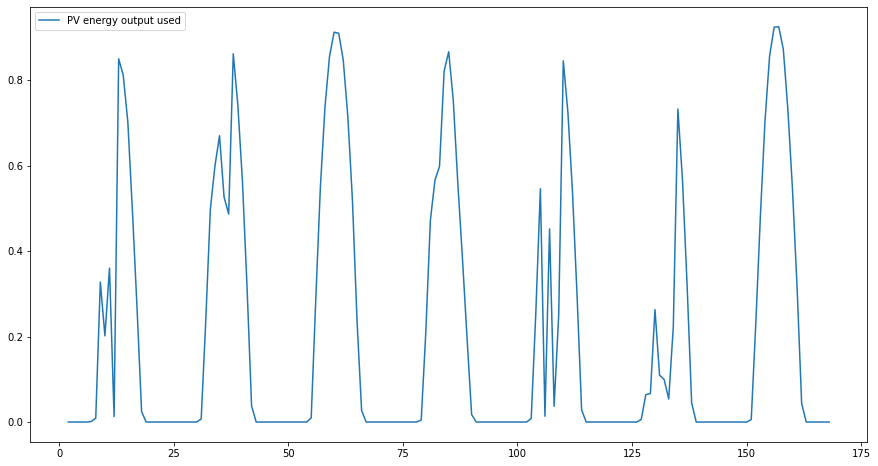

In [59]:
df_resultsTS_plot = df_resultsTS.sum(level=0, axis=1)

plt.figure()

#plt.plot(df_resultsTS_plot.stg_SoC[1:168], label='battery state-of-charge')
plt.plot(df_resultsTS_plot.PV_energy_gen_output[1:168], label='PV energy output used')
#plt.plot(df_resultsTS.pv_nominal_output.multiply(df_results['PV_capacity'][0])[1:168], label='PV annual generation')
#plt.plot(df_resultsTS.GEN_energy_gen_output[1:168], label='GEN energy output')
#plt.plot(df_resultsTS.loads[1:168], label='Electricity demand')
#plt.plot(df_resultsTS_plot.stg_flowIn[1:168], label='Storage flow in')
#plt.plot(-df_resultsTS_plot.stg_flowOut[1:168], label='Storage flow out')

plt.rcParams['figure.figsize'] = [15, 8]

plt.legend()

<Figure size 1080x576 with 0 Axes>

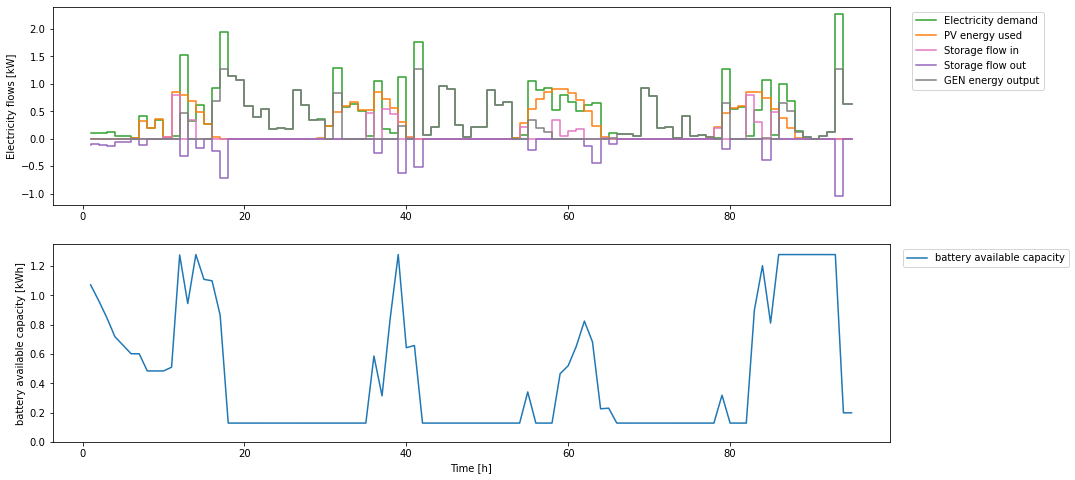

In [46]:
plt.figure()
df_resultsTS_plot = df_resultsTS.sum(level=0, axis=1)
hours = 96
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2)
x = list(range(1,hours))

plt.rcParams['figure.figsize'] = [15, 8]
#plt.plot(df_resultsTS_plot.stg_SoC[1:168], label='battery state-of-charge')


axis[0].step(x,df_resultsTS.loads[1:hours], label='Electricity demand', color = 'C2')
axis[0].step(x,df_resultsTS_plot.PV_energy_gen_output[1:hours], label='PV energy used', color = 'C1')
#axis[0].step(x,df_resultsTS.pv_nominal_output.multiply(df_results['PV_capacity'][0])[1:168], label='PV annual generation')

axis[0].step(x,df_resultsTS_plot.stg_flowIn[1:hours], label='Storage flow in', color = 'C6')
axis[0].step(x,-df_resultsTS_plot.stg_flowOut[1:hours], label='Storage flow out', color = 'C4')
axis[0].step(x,df_resultsTS.GEN_energy_gen_output[1:hours], label='GEN energy output', color = 'C7')
#axis[0].step(x,df_resultsTS_plot.electricity_excess[1:168], label='Electricity excess')
axis[0].set( ylabel='Electricity flows [kW]')
axis[0].legend(loc='upper right',bbox_to_anchor = (1.19, 1))
axis[0].set_ylim(-1.2,2.4)

axis[1].plot(x, df_resultsTS_plot.stg_SoC[1:hours], label='battery available capacity')
axis[1].set(xlabel='Time [h]', ylabel='battery available capacity [kWh]')
axis[1].legend(loc='upper right',bbox_to_anchor = (1.22, 1)) 
axis[1].set_ylim(0,1.35)

# Combine all the operations and display
plt.savefig('dispatchHRESopt.png',bbox_inches='tight')
plt.show()


In [10]:
#df_resultsTS_og = pd.read_csv(r'C:\Users\redi\Workspace\offgridders\simulation_results\electricity_mg/pv-wind-storage-diesel-mg_s_Jocotan_electricity_mg.csv')
df_resultsTS_og = pd.read_csv(r'C:\Users\redi\Workspace\offgridders\simulation_results\electricity_mg/pv-wind-storage-diesel-mg_s_Ixchil_electricity_mg.csv')

<Figure size 1080x576 with 0 Axes>

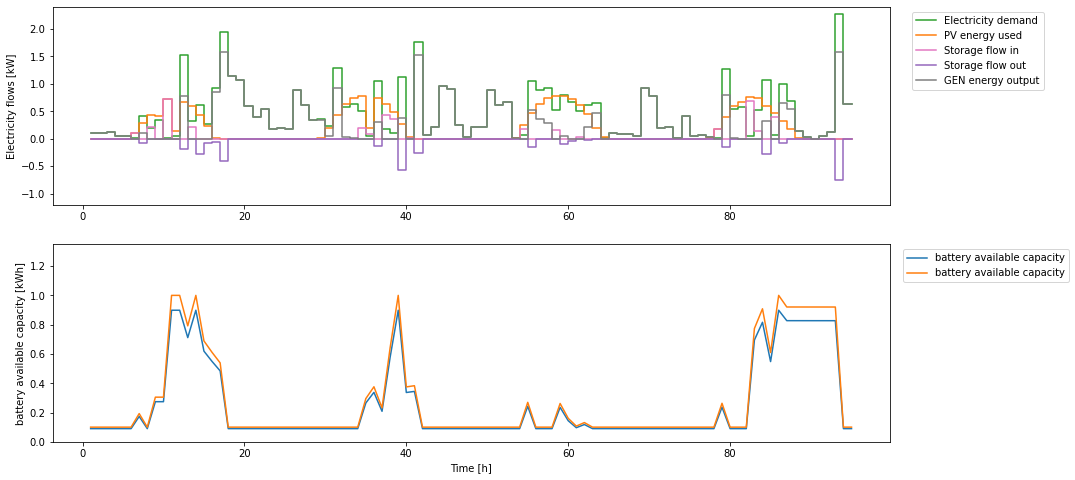

In [47]:
plt.figure()
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2)
hours = 96
x = list(range(1,hours))


#plt.plot(df_resultsTS_plot.stg_SoC[1:168], label='battery state-of-charge')

  
axis[0].step(x,df_resultsTS_og['Demand'][1:hours], label='Electricity demand', color = 'C2')
axis[0].step(x,(df_resultsTS_og['PV generation']-df_resultsTS_og['Excess generation'])[1:hours], label='PV energy used', color = 'C1')
#axis[0].step(x,df_resultsTS_og['PV generation'][1:168], label='PV annual generation')
axis[0].step(x,df_resultsTS_og['Storage charge'][1:hours], label='Storage flow in', color = 'C6')
axis[0].step(x,df_resultsTS_og['Storage discharge'][1:hours], label='Storage flow out', color = 'C4')
axis[0].step(x,df_resultsTS_og['Genset generation'][1:hours], label='GEN energy output', color = 'C7')
#axis[0].step(x,df_resultsTS_og['Excess generation'][1:hours], label='Electricity excess')
axis[0].set( ylabel='Electricity flows [kW]')
axis[0].legend(loc='upper right',bbox_to_anchor = (1.19, 1))
axis[0].set_ylim(-1.2,2.4)

# For Tangent Function
axis[1].plot(x, df_resultsTS_og['Storage SOC'].multiply(df_offgridders.loc['stg_capacity'][1])[1:hours], label='battery available capacity')
axis[1].set(xlabel='Time [h]', ylabel='battery available capacity [kWh]')
axis[1].legend(loc='upper right',bbox_to_anchor = (1.22, 1)) 
axis[1].set_ylim(0,1.35)

# Combine all the operations and display
plt.savefig('dispatchOffgridders.png', bbox_inches='tight')
plt.show()


In [13]:
df_offgridders.loc['GEN_capacity']

1    3.57788
Name: GEN_capacity, dtype: float64

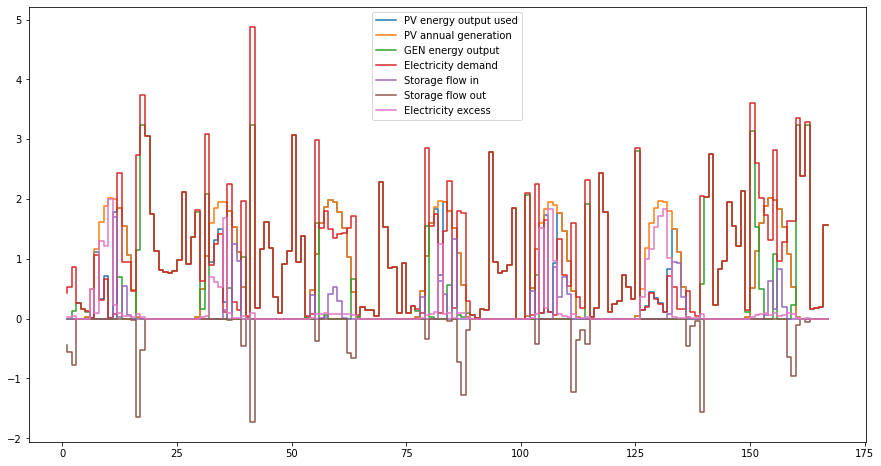

In [89]:
df_resultsTS_plot = df_resultsTS.sum(level=0, axis=1)
x = list(range(1,168))

plt.figure()

#plt.plot(df_resultsTS_plot.stg_SoC[1:168], label='battery state-of-charge')
plt.step(x,df_resultsTS_plot.PV_energy_gen_output[1:168], label='PV energy output used')
plt.step(x,df_resultsTS.pv_nominal_output.multiply(df_results['PV_capacity'][0])[1:168], label='PV annual generation')
plt.step(x,df_resultsTS.GEN_energy_gen_output[1:168], label='GEN energy output')
plt.step(x,df_resultsTS.loads[1:168], label='Electricity demand')
plt.step(x,df_resultsTS_plot.stg_flowIn[1:168], label='Storage flow in')
plt.step(x,-df_resultsTS_plot.stg_flowOut[1:168], label='Storage flow out')
plt.step(x,df_resultsTS_plot.electricity_excess[1:168], label='Electricity excess')


plt.rcParams['figure.figsize'] = [15, 8]

plt.legend()

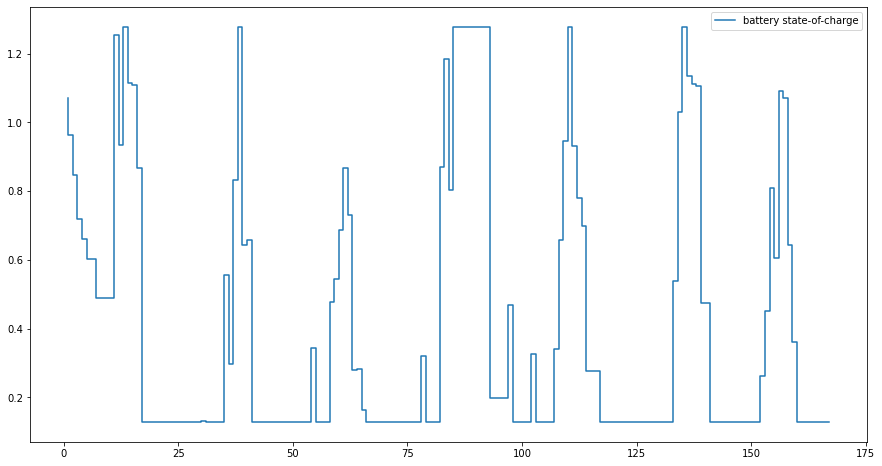

In [77]:
df_resultsTS_plot = df_resultsTS.sum(level=0, axis=1)
x = list(range(1,168))

plt.figure()

plt.step(x, df_resultsTS_plot.stg_SoC[1:168], label='battery state-of-charge')

plt.rcParams['figure.figsize'] = [15, 8]

plt.legend()

In [49]:
#df_resultsTS.pv_nominal_output.multiply(df_results['PV_capacity'])
df_results.PV_capacity[0]

2.0533928467224247

In [43]:
plt.figure()

#df_timeseries[['inverter_energy_output', 'NSL', 'PV_energy_output', 'stg_flowIn', 'stg_flowOut']].plot()
#df_timeseries[['stg_flowIn', 'stg_flowOut']].plot()

SOC_max = df_results['stg_capacity'][1]*df_results['stg_soc_max'][1]
SOC_min = df_results['stg_capacity'][1]*df_results['stg_soc_min'][1]

plt.plot(df_resultsTS.stg_SoC[1][1:168], label='SoC')
plt.plot([1,len(df_resultsTS.stg_SoC[1][1:168])],[SOC_max,SOC_max], label='SoC max')
plt.plot([1,len(df_resultsTS.stg_SoC[1][1:168])],[SOC_min,SOC_min], label='SoC min')
plt.legend()

#test SOC[t==0]
SoC_init = (1-df_results['stg_standby_losses'][1])*df_results['stg_capacity'][1]*df_results['stg_soc_initial'][1] - \
            df_resultsTS.stg_flowOut[1][1]/df_results['stg_efficiency_discharge'][1] + \
            df_resultsTS.stg_flowIn[1][1]*df_results['stg_efficiency_charge'][1]
print(SoC_init, df_resultsTS.stg_SoC[1][1])
#print(df_resultsTS.stg_SoC[1][1])
# test Crate
plt.figure()

max_charge_rate = df_results['stg_Crate_charge'][1]*df_results['stg_capacity'][1]
plt.plot(df_resultsTS.stg_flowIn[1][1:168], label='Storage flow in')
plt.plot([1,len(df_resultsTS.stg_SoC[1][1:168])],[max_charge_rate,max_charge_rate], label='maximum charge rate')

plt.figure()

max_discharge_rate = df_results['stg_Crate_discharge'][1]*df_results['stg_capacity'][1]
plt.plot(df_resultsTS.stg_flowOut[1][1:168], label='Storage flow out')
plt.plot(df_resultsTS.stg_flowIn[1][1:168], label='Storage flow in')
plt.plot([1,len(df_resultsTS.stg_SoC[1][1:168])],[max_discharge_rate,max_discharge_rate], label='maximum discharge rate')


# test PV capacity
plt.figure()

PVcap = df_results['PV_capacity']
plt.plot(df_resultsTS.PV_energy_gen_output[1:168], label='PV energy output used')
plt.plot(df_resultsTS.pv_nominal_output.multiply(float(PVcap))[1:168], label='PV available energy output')


# test Inverter capacity
plt.figure()
BIDcap = df_results['BID_capacity']
plt.plot(df_resultsTS.inverter_energy_output[1:168], label='Inverter energy output')
plt.plot([1,len(df_resultsTS.stg_SoC[1][1:168])],[BIDcap,BIDcap], label='BID capacity')
# test NSL
NSL_ratio = sum(df_resultsTS.NSL)/sum(df_resultsTS.loads)
print(NSL_ratio <= df_results['NSL_max_allowed'], NSL_ratio, df_results['NSL_max_allowed'])

#Test costs

Total_Cost_var = df_results['total_cost']
r  = df_results['discount_rate']

def AF(r, L):
    return r/(1-(r+1)**(-L))


IndexError: invalid index to scalar variable.

<Figure size 1080x576 with 0 Axes>